In [1]:
from __future__ import division
import pylab as plt
from numpy import random,argwhere,linspace
import numpy as np
from scipy import integrate
%matplotlib inline

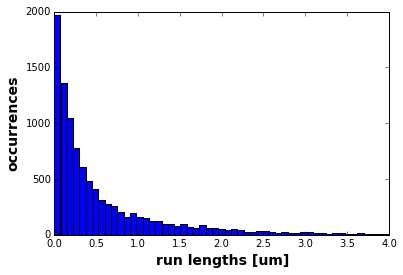

In [18]:
def rand_double_exp(n=1,a=1,b=0.2):
    """
    a = first decay rate, um
    b = second decay rate, um
    """
    x = linspace(0,10*max([a,b]),10000)
    pdf = np.exp(-x/a)/(2*a)+np.exp(-x/b)/(2*b)
    cdf = integrate.cumtrapz(pdf,x)
    cdf[-1] = np.inf # make sure rand() is less than one value in cdf
    if n == 1:
        return x[np.argwhere(random.rand() < cdf)[0][0]]
    elif n > 1:
        return np.array([x[np.argwhere(random.rand() < cdf)[0][0]] for _ in range(n)])
    else:
        raise Exception('n must be greater than 1')

plt.figure()
plt.hist(rand_double_exp(10000),100)
plt.xlabel('run lengths [um]',fontsize=14,fontweight='bold')
plt.ylabel('occurrences',fontsize=14,fontweight='bold')
plt.xlim([0,4])
plt.show()

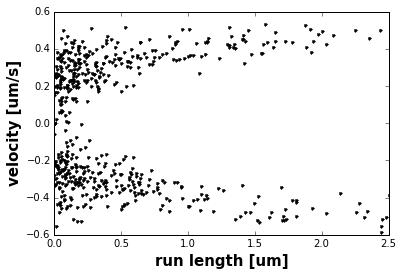

In [110]:
def rand_run(p=[0.3,0.3],v0=[0.25,-0.25],a=[1,1],b=[0.2,0.2]):
    assert sum(p) <= 1
    p.append(1-sum(p)) # probability for pausing
    i = argwhere(random.multinomial(1,p))[0][0] # choose anterograde, retrograde, or pause
    if i == 2:
        L,V = 0,0 # run length and velocity
    else:
        L = rand_double_exp(a=a[i],b=b[i])
        V = random.normal(v0[i]+0.2*np.log(L+1)*np.sign(v0[i]),0.11-(0.08*L)/(0.7+L))
    return (L,V)

plt.figure()
for i in range(1000):
    L,V = rand_run()
    plt.plot(L,V,'.k')
plt.xlim([0,2.5])
plt.ylim([-0.6,0.6])
plt.xlabel('run length [um]',fontweight='bold',fontsize=15)
plt.ylabel('velocity [um/s]',fontweight='bold',fontsize=15)

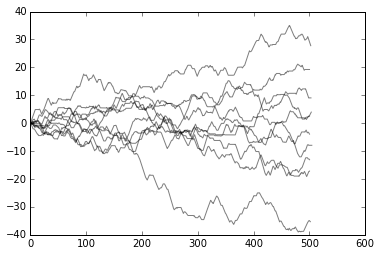

In [118]:
plt.figure()
for _ in range(10):
    x = [0]
    t = [0]
    tmax = 500 # seconds
    while t[-1] < tmax:
        L,V = rand_run()
        if L == 0:
            x.append(x[-1])
            t.append(t[-1] + rand_double_exp(a=2,b=0.5))
        else:
            x.append(x[-1] + L*np.sign(V))
            t.append(t[-1] + abs(L/V))
    plt.plot(t,x,'-k',alpha=0.5)
plt.show()